# Choatic Systems

The chaotic systems are a set of dynamical systems that exhibit chaotic behavior, which makes them a challenging benchmark for time series prediction algorithms.

## Setup


In [1]:
import os
import sys
import torch

project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if project_root not in sys.path:
    sys.path.append(project_root)

try:
    from src.utils.seed_utils import set_global_seeds
except ImportError:
    raise ImportError("Cannot import module. Make sure that the project is on the path")

set_global_seeds()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


## Chaotic Systems


### Lorenz

A classic chaotic system describing atmospheric convection with a "butterfly shape" attractor.

It exhibits sensitive dependence on initial conditions and multi-scale temporal patterns, which are valuable for modeling the complex dynamics of EMG signals.


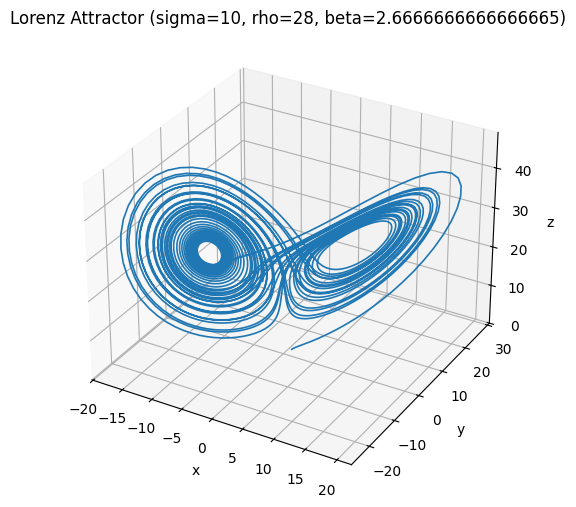

(<Figure size 800x600 with 1 Axes>,
 <Axes3D: title={'center': 'Lorenz Attractor (sigma=10, rho=28, beta=2.6666666666666665)'}, xlabel='x', ylabel='y', zlabel='z'>)

In [2]:
from src.data_sources.lorenz import LorenzOscillator

lorenz = LorenzOscillator(sigma=10, rho=28, beta=8.0 / 3.0)

lorenz.plot_trajectory(initial_state=[1.0, 1.0, 1.0], t_span=[0, 40], max_step=1e-2)

### Fibonacci

A system based on the Fibonacci sequence, extended with nonlinear perturbations to exhibit chaos while retaining quasi-periodic and self-similar properties.

Its simple rules create complex, dynamic behaviors that efficiently model temporal dependencies, making it ideal for computing the dynamics of EMG signals.


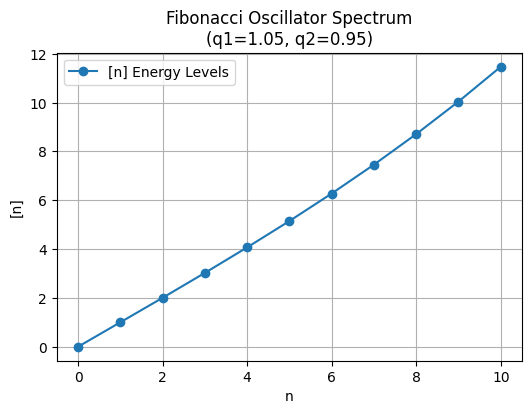

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Fibonacci Oscillator Spectrum\n(q1=1.05, q2=0.95)'}, xlabel='n', ylabel='[n]'>)

In [3]:
from src.data_sources.fibonacci import FibonacciOscillator

fib_osc = FibonacciOscillator(q1=1.05, q2=0.95)

fib_osc.plot_energy_levels(n_min=0, n_max=10)

### Van der Pol

A nonlinear oscillator that transitions from limit cycles to chaos when driven or coupled, originally used to model electrical circuits and biological rhythms.

Its ability to simulate oscillatory behavior and chaotic transitions mirrors the dynamic nature of speech-related EMG signals, making it highly applicable for modeling the dynamics of EMG signals.


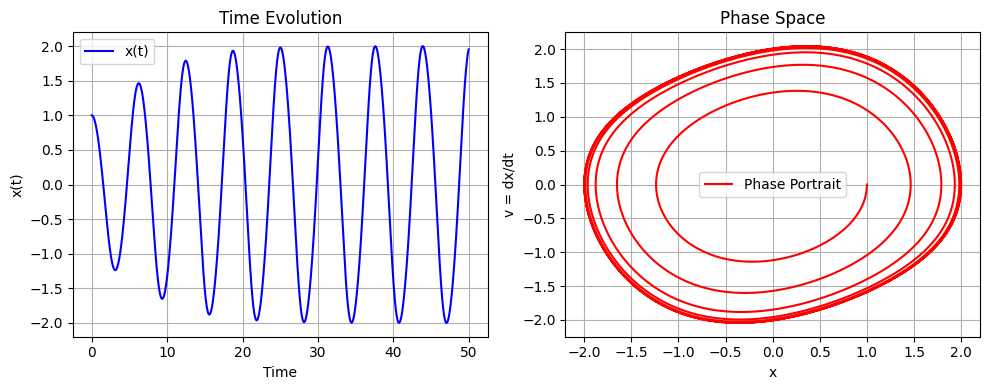

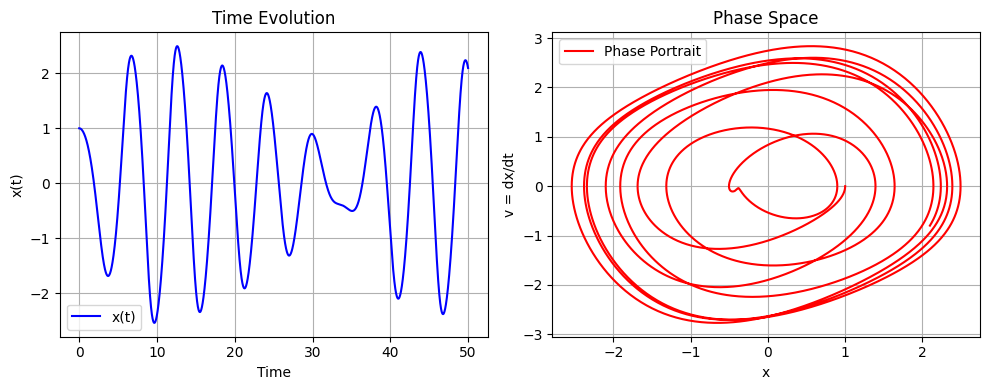

(<Figure size 1000x400 with 2 Axes>,
 <Axes: title={'center': 'Time Evolution'}, xlabel='Time', ylabel='x(t)'>,
 <Axes: title={'center': 'Phase Space'}, xlabel='x', ylabel='v = dx/dt'>)

In [4]:
from src.data_sources.van_der_pol import VanDerPolOscillator

init_state = [1.0, 0.0]  # x0=1, v0=0

# Free Van der Pol oscillator example
vdp_free = VanDerPolOscillator(omega_0=1.0, epsilon=0.2, forcing_amplitude=0.0)
vdp_free.plot_trajectory(initial_state=init_state, t_span=(0, 50))

# Forced Van der Pol oscillator example
vdp_forced = VanDerPolOscillator(
    omega_0=1.0, epsilon=0.2, forcing_amplitude=0.5, forcing_freq=1.2
)
vdp_forced.plot_trajectory(initial_state=init_state, t_span=(0, 50))